<a href="https://colab.research.google.com/github/sreemannarayanac/Projects/blob/main/workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
img = load_img('/content/drive/MyDrive/Projects/clothing-dataset-small/train/t-shirt/0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg', target_size=(299, 299))

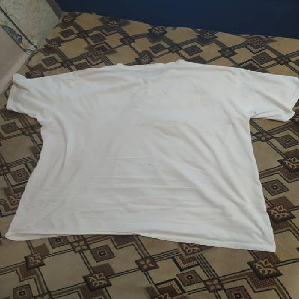

In [ ]:
img

In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

In [ ]:
x

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

## Pre trained CNN

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 1s 0us/step


In [ ]:
X = preprocess_input(x.reshape(1, 299, 299, 3))

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.95249814),
  ('n04370456', 'sweatshirt', 0.009788701),
  ('n04033995', 'quilt', 0.0031949661),
  ('n03710637', 'maillot', 0.0012328885),
  ('n03188531', 'diaper', 0.0011855065)]]

In [ ]:
def give_top_3(path_to_image):
    img = load_img(path_to_image, target_size=(299, 299))
    x = np.array(img)
    X = preprocess_input(x.reshape(1, 299, 299, 3))
    pred = model.predict(X)
    return decode_predictions(pred, top=3)[0]

give_top_3('/content/drive/MyDrive/Projects/clothing-dataset-small/train/shoes/1ece3817-f6ca-46a2-b514-f2d3de572399.jpg')

1/1 [==============================] - 0s 21ms/step


[('n04120489', 'running_shoe', 0.33725667),
 ('n03680355', 'Loafer', 0.2804297),
 ('n04254777', 'sock', 0.061216637)]

## Transfer learning

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
"""
Load and preprocess the training dataset.

Args:
    train_gen (DirectoryIterator): Directory iterator for the training dataset.
    target_size (tuple): The desired size of the image after resizing.
    batch_size (int): The number of samples per batch.

Returns:
    train_ds (DirectoryIterator): Directory iterator for the preprocessed training dataset.
"""
train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/Projects/clothing-dataset-small/train/', target_size=(150, 150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
"""
This line of code retrieves the next batch of data from the train dataset.

Parameters:
- train_ds: The train dataset.

Returns:
- X: The input data of the next batch.
- y: The target labels of the next batch.
"""

X, y = next(train_ds)

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('/content/drive/MyDrive/Projects/clothing-dataset-small/validation/', target_size=(150, 150), batch_size=32)

Found 341 images belonging to 10 classes.


In [ ]:
"""
This code initializes a base model using the Xception architecture for image classification.
The model is pre-trained on the ImageNet dataset and has its top layer (fully connected layer) excluded.
The input shape of the model is set to (150, 150, 3), which represents the dimensions of the input images.
The base model is set to be non-trainable, meaning its weights will not be updated during training.
"""
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
"""
This code defines a Keras model for clothes classification.

Parameters:
- inputs: The input tensor of shape (batch_size, 150, 150, 3).

Returns:
- model: A Keras Model object that takes inputs of shape (150, 150, 3) and outputs the vectors obtained from the base model.

Example usage:
inputs = keras.Input(shape=(150, 150, 3))
model = create_model(inputs)
"""
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
preds = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
preds.shape

(32, 10)

In [ ]:
preds[0]

array([ 0.4705795 , -0.41734114,  0.02540599, -0.6855797 , -0.37864232,
        0.739701  , -0.08978459,  0.7964785 , -0.06450485,  0.45965   ],
      dtype=float32)

### Optimising the model

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 84s 884ms/step - loss: 0.5729 - accuracy: 0.8188 - val_loss: 0.9626 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3545 - accuracy: 0.8823 - val_loss: 0.8621 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3069 - accuracy: 0.9065 - val_loss: 1.0756 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2094 - accuracy: 0.9312 - val_loss: 1.0662 - val_accuracy: 0.7478
Epoch 5/10
96/96 [==============================] - 12s 128ms/step - loss: 0.1247 - accuracy: 0.9573 - val_loss: 0.9201 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 11s 116ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 1.0074 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 12s 121ms/step - loss: 0.0695 - accuracy: 0.9762 - val_loss: 0.9702 - val_accuracy: 0.8006

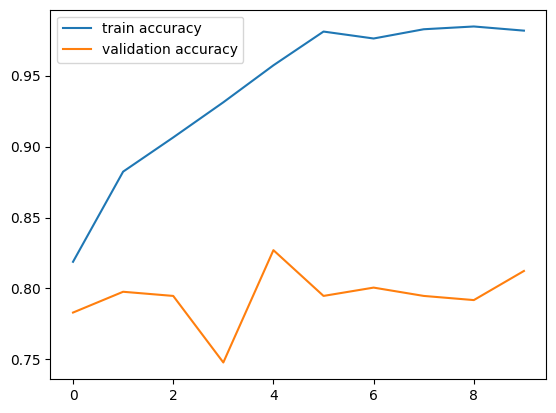

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy, label='train accuracy')
plt.plot(val_accuracy, label='validation accuracy')
plt.legend();

## Adjusting the learning rate

In [ ]:
def make_model(learning_rate=0.001):
  base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

  base_model.trainable = False

  #################################################

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  #################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  return model

In [ ]:
scores = {}

for lr in {0.1, 0.01, 0.001, 0.0001}:
  model = make_model(lr)
  history = model.fit(train_ds, epochs=6, validation_data=val_ds)
  scores[lr] = history.history

Epoch 1/6
96/96 [==============================] - 16s 127ms/step - loss: 10.6691 - accuracy: 0.6418 - val_loss: 5.0139 - val_accuracy: 0.7507
Epoch 2/6
96/96 [==============================] - 12s 122ms/step - loss: 4.8854 - accuracy: 0.7839 - val_loss: 6.6626 - val_accuracy: 0.7566
Epoch 3/6
96/96 [==============================] - 12s 127ms/step - loss: 3.6969 - accuracy: 0.8233 - val_loss: 7.7725 - val_accuracy: 0.7742
Epoch 4/6
96/96 [==============================] - 13s 133ms/step - loss: 2.8779 - accuracy: 0.8563 - val_loss: 8.3794 - val_accuracy: 0.7771
Epoch 5/6
96/96 [==============================] - 11s 119ms/step - loss: 2.5651 - accuracy: 0.8875 - val_loss: 8.6548 - val_accuracy: 0.7742
Epoch 6/6
96/96 [==============================] - 12s 121ms/step - loss: 1.5350 - accuracy: 0.9126 - val_loss: 7.7849 - val_accuracy: 0.7918
Epoch 1/6
96/96 [==============================] - 16s 132ms/step - loss: 1.9828 - accuracy: 0.3263 - val_loss: 1.6147 - val_accuracy: 0.4868
Epoch

In [ ]:
del scores[0.0001]
del scores[0.1]

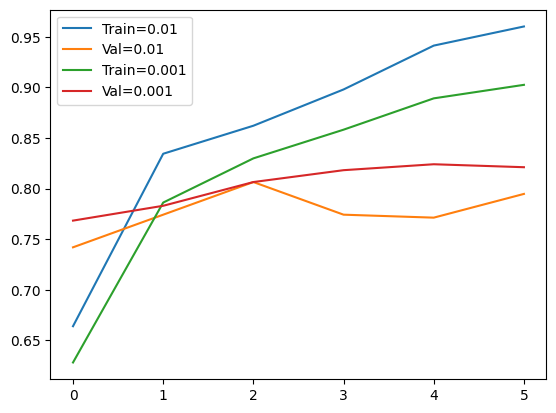

In [ ]:
for lr, score in scores.items():
  plt.plot(score['accuracy'], label='Train=%s' % lr)
  plt.plot(score['val_accuracy'], label='Val=%s' % lr)

plt.xticks(np.arange(6))
plt.legend();

In [ ]:
## Therefore the best learning rate is 0.001
learning_rate = 0.001

## Checkpointing

In [ ]:
model.save_weights('model_v5.h5', save_format='h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

## Adding more dense layers

In [ ]:
def make_model(learning_rate=0.001, size_inner=100):
  base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

  base_model.trainable = False

  #################################################

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  outputs = keras.layers.Dense(10)(inner)

  model = keras.Model(inputs, outputs)

  #################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(size)
  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] = history.history
  print(); print();

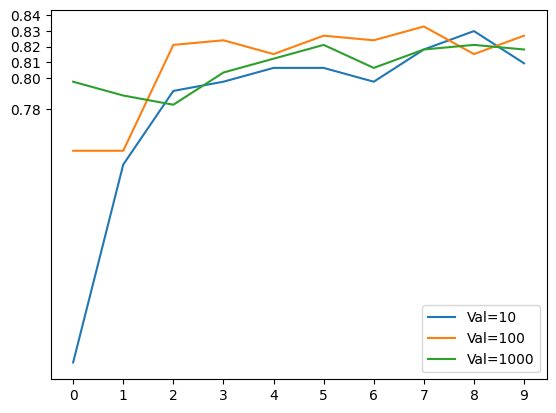

In [ ]:
for lr, score in scores.items():
  # plt.plot(score['accuracy'], label='Train=%s' % lr)
  plt.plot(score['val_accuracy'], label='Val=%s' % lr)

plt.yticks([0.78, 0.80, 0.81, 0.82, 0.83, 0.84])
plt.xticks(np.arange(0, 10))
plt.legend();

## Regularization and Dropout

In [ ]:
def make_model(learning_rate=0.001, size_inner=100, droprate=0.5):
  base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

  base_model.trainable = False

  #################################################

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  drop = keras.layers.Dropout(droprate)(inner)

  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  #################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(
      learning_rate=learning_rate,
      size_inner=size,
      droprate=droprate
  )

  history = model.fit(train_ds, epochs=20, validation_data=val_ds)
  scores[droprate] = history.history
  print(); print();

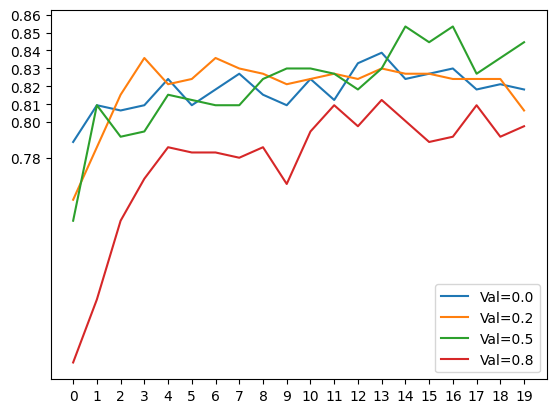

In [ ]:
for dr, score in scores.items():
  # plt.plot(score['accuracy'], label='Train=%s' % lr)
  plt.plot(score['val_accuracy'], label='Val=%s' % dr)

plt.yticks([0.78, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86])
plt.xticks(np.arange(0, 20))
plt.legend();

Best Parameters So Far  
1. Learning Rate = 0.001
2. Inner Dense Layer Size = 100
3. Dropout Rate = 0.5 (20 epochs)

In [ ]:
# Saving the best model obtained so far

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'
)

model = make_model(droprate=0.3)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/20
96/96 [==============================] - ETA: 0s - loss: 1.0890 - accuracy: 0.6336 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 1091s 11s/step - loss: 1.0890 - accuracy: 0.6336 - val_loss: 0.6968 - val_accuracy: 0.7918
Epoch 2/20
96/96 [==============================] - 341s 4s/step - loss: 0.6702 - accuracy: 0.7608 - val_loss: 0.6102 - val_accuracy: 0.8065
Epoch 3/20
96/96 [==============================] - 345s 4s/step - loss: 0.5283 - accuracy: 0.8188 - val_loss: 0.5514 - val_accuracy: 0.8182
Epoch 4/20
96/96 [==============================] - 338s 4s/step - loss: 0.4058 - accuracy: 0.8644 - val_loss: 0.5415 - val_accuracy: 0.8094
Epoch 5/20
96/96 [==============================] - 346s 4s/step - loss: 0.3338 - accuracy: 0.8836 - val_loss: 0.5385 - val_accuracy: 0.8182
Epoch 6/20
96/96 [==============================] - 341s 4s/step - loss: 0.2672 - accuracy: 0.9136 - val_loss: 0.5457 - val_accuracy: 0.8182
Epoch 7/20
96/96 [==============================] - 345s 4s/step - loss: 0.2400 - accuracy: 0.9188 - val_loss: 0.5219 - val_accuracy: 0.8475
Epoch 8/20
96/96 [====

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend();